In [62]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/liver-cirrhosis-stage-classification/liver_cirrhosis.csv


### Data Analysis and Cleaning

In [63]:
df = pd.read_csv('/kaggle/input/liver-cirrhosis-stage-classification/liver_cirrhosis.csv')
df.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2221,C,Placebo,18499,F,N,Y,N,N,0.5,149.0,4.04,227.0,598.0,52.70,57.0,256.0,9.9,1
1,1230,C,Placebo,19724,M,Y,N,Y,N,0.5,219.0,3.93,22.0,663.0,45.00,75.0,220.0,10.8,2
2,4184,C,Placebo,11839,F,N,N,N,N,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0,2
3,2090,D,Placebo,16467,F,N,N,N,N,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,151.0,10.2,2
4,2105,D,Placebo,21699,F,N,Y,N,N,1.9,486.0,3.54,74.0,1052.0,108.50,109.0,151.0,11.5,1


In [64]:
df.isna().sum()

N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         25000 non-null  int64  
 1   Status         25000 non-null  object 
 2   Drug           25000 non-null  object 
 3   Age            25000 non-null  int64  
 4   Sex            25000 non-null  object 
 5   Ascites        25000 non-null  object 
 6   Hepatomegaly   25000 non-null  object 
 7   Spiders        25000 non-null  object 
 8   Edema          25000 non-null  object 
 9   Bilirubin      25000 non-null  float64
 10  Cholesterol    25000 non-null  float64
 11  Albumin        25000 non-null  float64
 12  Copper         25000 non-null  float64
 13  Alk_Phos       25000 non-null  float64
 14  SGOT           25000 non-null  float64
 15  Tryglicerides  25000 non-null  float64
 16  Platelets      25000 non-null  float64
 17  Prothrombin    25000 non-null  float64
 18  Stage 

#### Feature Description

- N_Days: Number of days between registration and the earlier of death, transplantation, or study analysis time in 1986
- Status: status of the patient C (censored), CL (censored due to liver tx), or D (death)
- Drug: type of drug D-penicillamine or placebo
- Age: age in days
- Sex: M (male) or F (female)
- Ascites: presence of ascites N (No) or Y (Yes)
- Hepatomegaly: presence of hepatomegaly N (No) or Y (Yes)
- Spiders: presence of spiders N (No) or Y (Yes)
- Edema: presence of edema N (no edema and no diuretic therapy for edema), S (edema present without diuretics, or edema resolved by diuretics), or Y (edema despite diuretic therapy)
- Bilirubin: serum bilirubin in [mg/dl]
- Cholesterol: serum cholesterol in [mg/dl]
- Albumin: albumin in [gm/dl]
- Copper: urine copper in [ug/day]
- Alk_Phos: alkaline phosphatase in [U/liter]
- SGOT: SGOT in [U/ml]
- Tryglicerides: triglicerides in [mg/dl]
- Platelets: platelets per cubic [ml/1000]
- Prothrombin: prothrombin time in seconds [s]
- Stage: histologic stage of disease ( 1, 2, or 3 )


### Data Preprocessing

Handling nilai yang hilang dan pengkodean variabel kategorikal.
Menangani Nilai yang Hilang

Untuk mempermudah, kita akan membuang baris dengan nilai yang hilang. Pendekatan yang lebih canggih dapat melibatkan imputasi nilai yang hilang.

In [66]:
# Drop rows with any missing values
df.dropna(inplace=True)

# Verify that there are no more missing values
df.isna().sum()

N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

#### Encoding Categorical Variables

Variabel kategorikal perlu dikonversi ke dalam format numerik. Kita akan menggunakan pengkodean satu-panas untuk variabel kategorikal.

In [67]:
# Convert categorical variables to numerical using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema'], drop_first=True)

# Display the first few rows of the encoded dataset
df_encoded.head()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,...,Stage,Status_CL,Status_D,Drug_Placebo,Sex_M,Ascites_Y,Hepatomegaly_Y,Spiders_Y,Edema_S,Edema_Y
0,2221,18499,0.5,149.0,4.04,227.0,598.0,52.70,57.0,256.0,...,1,False,False,True,False,False,True,False,False,False
1,1230,19724,0.5,219.0,3.93,22.0,663.0,45.00,75.0,220.0,...,2,False,False,True,True,True,False,True,False,False
2,4184,11839,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,...,2,False,False,True,False,False,False,False,False,False
3,2090,16467,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,151.0,...,2,False,True,True,False,False,False,False,False,False
4,2105,21699,1.9,486.0,3.54,74.0,1052.0,108.50,109.0,151.0,...,1,False,True,True,False,False,True,False,False,False


### Exploratory Data Analysis (EDA)

Dilakukan beberapa analisis data eksplorasi untuk memahami hubungan dalam data.

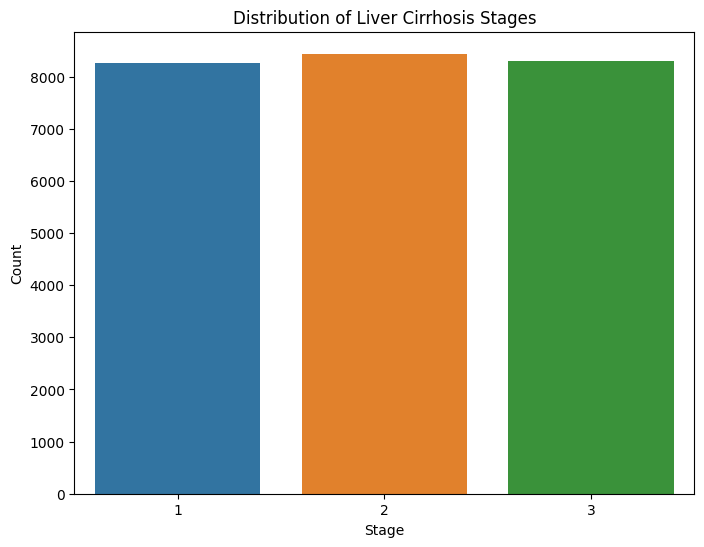

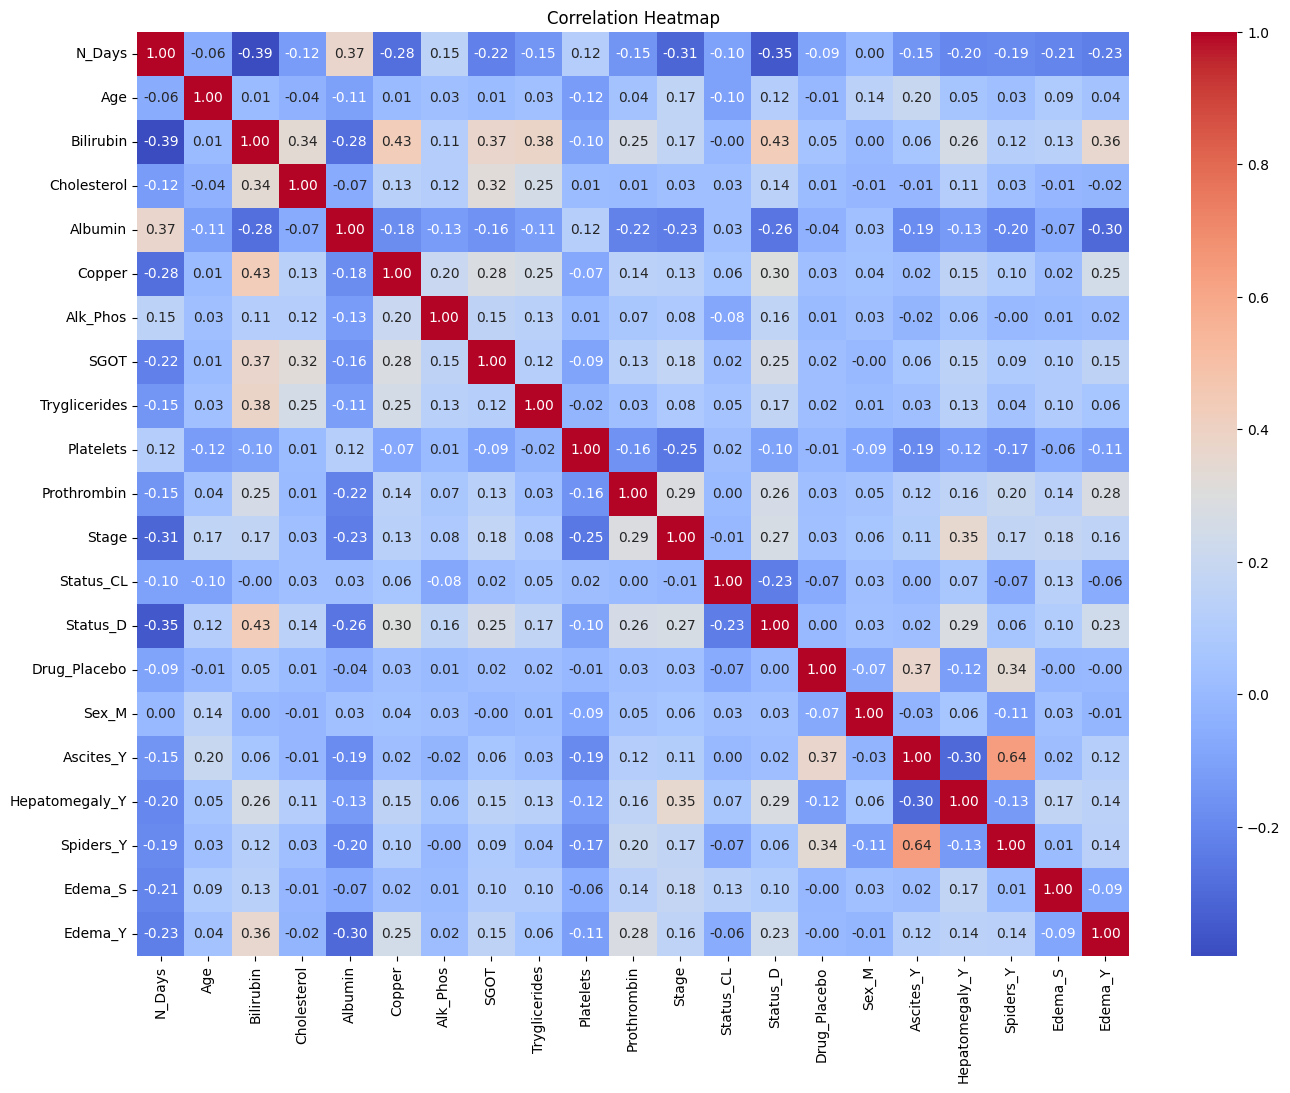

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of the target variable (Stage)
plt.figure(figsize=(8, 6))
sns.countplot(x='Stage', data=df_encoded)
plt.title('Distribution of Liver Cirrhosis Stages')
plt.xlabel('Stage')
plt.ylabel('Count')
plt.show()

# Correlation heatmap to understand the relationships between features
plt.figure(figsize=(16, 12))
correlation_matrix = df_encoded.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


### Splitting Data into Training and Testing Sets

Membagi data ke dalam set pelatihan dan pengujian untuk mengevaluasi kinerja model pada data yang tidak terlihat.

In [69]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = df_encoded.drop('Stage', axis=1)
y = df_encoded['Stage']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((20000, 20), (5000, 20), (20000,), (5000,))

### Classification With Varying Models

Saya akan mencoba beberapa algoritma klasifikasi untuk membandingkan kinerjanya dalam tugas klasifikasi tahap sirosis hati. Saya akan menggunakan algoritma seperti Regresi Logistik, Support Vector Machines (SVM), Decision Trees, dan Gradient Boosting.

In [70]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the model
knn_model = KNeighborsClassifier()

# Train the model
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
print("K-Nearest Neighbors (KNN) Model:")
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


K-Nearest Neighbors (KNN) Model:
[[1358  199  100]
 [ 157 1442   98]
 [ 141  132 1373]]
              precision    recall  f1-score   support

           1       0.82      0.82      0.82      1657
           2       0.81      0.85      0.83      1697
           3       0.87      0.83      0.85      1646

    accuracy                           0.83      5000
   macro avg       0.84      0.83      0.83      5000
weighted avg       0.84      0.83      0.83      5000



In [71]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy for the KNN model
knn_accuracy = accuracy_score(y_test, y_pred_knn)

# Print the accuracy
print("Accuracy for K-Nearest Neighbors (KNN) Model:", knn_accuracy)

Accuracy for K-Nearest Neighbors (KNN) Model: 0.8346


In [72]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
print("Decision Tree Model:")
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


Decision Tree Model:
[[1504   94   59]
 [  94 1545   58]
 [  39   70 1537]]
              precision    recall  f1-score   support

           1       0.92      0.91      0.91      1657
           2       0.90      0.91      0.91      1697
           3       0.93      0.93      0.93      1646

    accuracy                           0.92      5000
   macro avg       0.92      0.92      0.92      5000
weighted avg       0.92      0.92      0.92      5000



In [73]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy for the Decision Tree model
dt_accuracy = accuracy_score(y_test, y_pred_dt)

# Print the accuracy
print("Accuracy for Decision Tree Model:", dt_accuracy)

Accuracy for Decision Tree Model: 0.9172


In [74]:
from sklearn.naive_bayes import GaussianNB

# Initialize the model
nb_model = GaussianNB()

# Train the model
nb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_nb = nb_model.predict(X_test)

# Evaluate the model
print("Naive Bayes Model:")
print(confusion_matrix(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

Naive Bayes Model:
[[1295  182  180]
 [1019  493  185]
 [ 489  324  833]]
              precision    recall  f1-score   support

           1       0.46      0.78      0.58      1657
           2       0.49      0.29      0.37      1697
           3       0.70      0.51      0.59      1646

    accuracy                           0.52      5000
   macro avg       0.55      0.53      0.51      5000
weighted avg       0.55      0.52      0.51      5000



In [75]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy for the Naive Bayes model
gNB_accuracy = accuracy_score(y_test, y_pred_nb)

# Print the accuracy
print("Accuracy for Naive Bayes Model:", gNB_accuracy)

Accuracy for Naive Bayes Model: 0.5242


In [76]:
from sklearn.svm import SVC

# Initialize the model
svm_model = SVC(kernel='rbf', random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
print("Support Vector Machine (SVM) Model:")
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


Support Vector Machine (SVM) Model:
[[958 345 354]
 [694 544 459]
 [301 367 978]]
              precision    recall  f1-score   support

           1       0.49      0.58      0.53      1657
           2       0.43      0.32      0.37      1697
           3       0.55      0.59      0.57      1646

    accuracy                           0.50      5000
   macro avg       0.49      0.50      0.49      5000
weighted avg       0.49      0.50      0.49      5000



In [77]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy for the SVM model
svm_accuracy = accuracy_score(y_test, y_pred_svm)

# Print the accuracy
print("Accuracy for Support Vector Machine (SVM) Model:", svm_accuracy)

Accuracy for Support Vector Machine (SVM) Model: 0.496


In [78]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Input
from sklearn.model_selection import train_test_split

# Label encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the number of classes
num_class = y_categorical.shape[1]

# Initialize the ANN
ann = Sequential()
ann.add(Input(shape=(X.shape[1],)))
ann.add(Dense(units=64, activation='relu'))
ann.add(Dense(units=32, activation='relu'))
ann.add(Dense(units=16, activation='relu'))
ann.add(Dense(units=num_class, activation='softmax'))

# Compile the model
ann.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the ANN on the training data
history = ann.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5527 - loss: 0.9337 - val_accuracy: 0.7055 - val_loss: 0.7098
Epoch 2/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7176 - loss: 0.6589 - val_accuracy: 0.7545 - val_loss: 0.5927
Epoch 3/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7693 - loss: 0.5630 - val_accuracy: 0.7897 - val_loss: 0.5393
Epoch 4/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7997 - loss: 0.5118 - val_accuracy: 0.8050 - val_loss: 0.4975
Epoch 5/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8205 - loss: 0.4682 - val_accuracy: 0.8213 - val_loss: 0.4680
Epoch 6/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8434 - loss: 0.4278 - val_accuracy: 0.8307 - val_loss: 0.4467
Epoch 7/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8430 - loss: 0.4169 - val_accuracy: 0.8415 - val_loss: 0.4275
Epoch 8/50
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8591 - loss: 0.3907 - val_accuracy: 0.

In [79]:
# Evaluate the ANN on the test data
test_loss, test_accuracy = ann.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy}')
ann_accuracy = test_accuracy


157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8945 - loss: 0.4040
Test accuracy: 0.8889999985694885


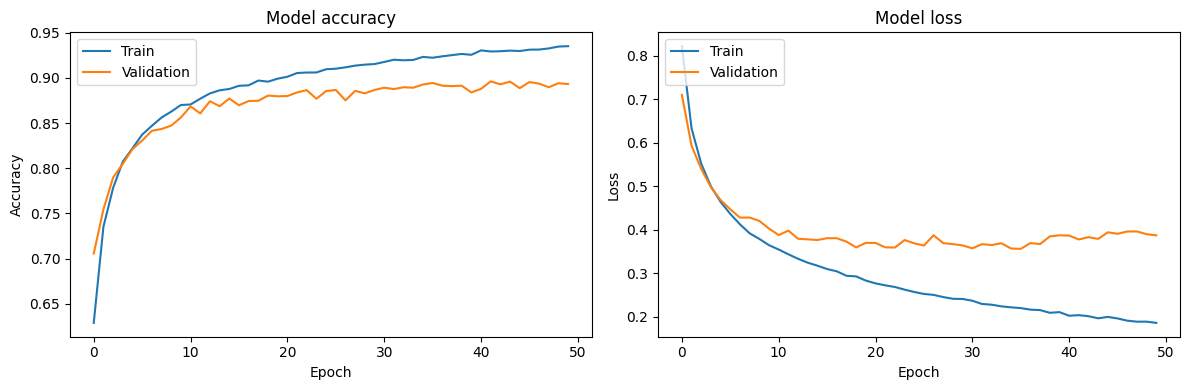

In [80]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


Accuracy For k-NN:  0.8346
Accuracy For Decicion Tree:  0.9172
Accuracy For Gaussian NB:  0.5242
Accuracy For SVM:  0.496
Accuracy For ANN:  0.8889999985694885


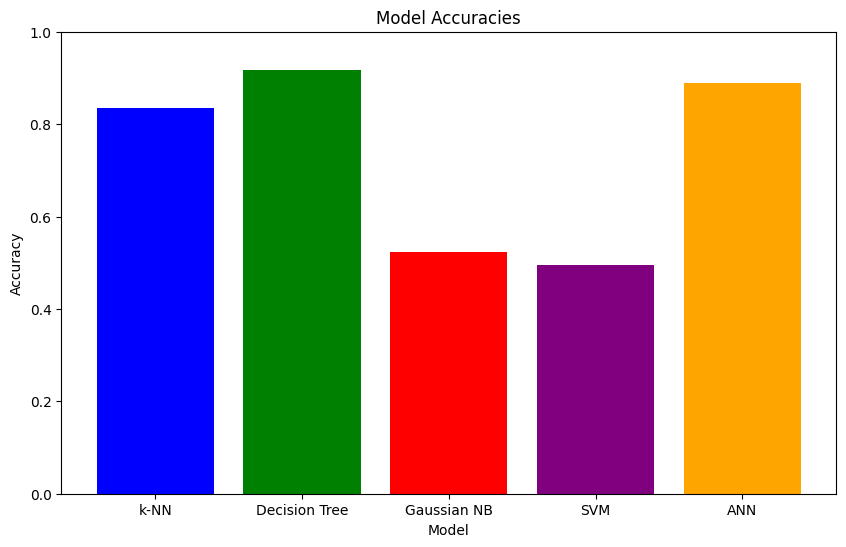

In [81]:
models = ['k-NN', 'Decision Tree', 'Gaussian NB', 'SVM', 'ANN']
accuracies = [knn_accuracy, dt_accuracy, gNB_accuracy, svm_accuracy, ann_accuracy]

print("Accuracy For k-NN: ", knn_accuracy)
print("Accuracy For Decicion Tree: ", dt_accuracy)
print("Accuracy For Gaussian NB: ", gNB_accuracy)
print("Accuracy For SVM: ", svm_accuracy)
print("Accuracy For ANN: ", ann_accuracy)

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.ylim([0, 1])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracies')
plt.show()


### Conclussion

Dalam tugas klasifikasi ini, kami mengevaluasi beberapa model pembelajaran mesin pada dataset. Berikut adalah temuan-temuan utamanya:

- Decision Tree mencapai akurasi tertinggi sebesar 91,72%, yang menunjukkan keefektifannya dalam menangkap pola yang mendasari data.
- K-Nearest Neighbors (k-NN) juga berkinerja baik dengan akurasi 83,46%, yang menunjukkan kemampuannya dalam mengklasifikasikan contoh berdasarkan kemiripan dengan titik data tetangga.
- Artificial Neural Network (ANN) menunjukkan kinerja yang kompetitif dengan akurasi 88,90%, yang menunjukkan kemampuannya untuk mempelajari hubungan yang kompleks dalam data.
- Gaussian Naive Bayes (Gaussian NB) menghasilkan akurasi terendah yaitu 52,42%, menunjukkan keterbatasannya dalam menangani kompleksitas yang mendasari set data.
- Support Vector Machine (SVM) memiliki akurasi 49,60%, yang mungkin mengindikasikan bahwa kernel atau hiperparameter yang dipilih tidak optimal untuk dataset ini.

Secara ringkas, model Decision Tree muncul sebagai model dengan performa terbaik, diikuti oleh ANN dan k-NN, sementara Gaussian NB dan SVM menunjukkan akurasi yang relatif lebih rendah. Hasil ini menyoroti pentingnya memilih algoritma yang tepat dan parameter tuning untuk mencapai kinerja klasifikasi yang optimal.
